In [61]:
import pandas as pd
import numpy as np
import pylab as pl
from pandas import DataFrame
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/sebscho/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [100]:
results = pd.read_csv('survey_edited_041118.csv')

In [101]:
# rename columns 
results.columns = ['timestamp', 'everyday_items', 'clothes_electronics', 'meal_delivery', 'games', 
                'dating', 'tickets', 'rideshare', 'name', 'email']

results.head(5)

,timestamp,everyday_items,clothes_electronics,meal_delivery,games,dating,tickets,rideshare,name,email
0,4/2/2018 17:25:48,At home,At home,At work,On my commute,I don't use dating apps on my phone,On my commute,At home,NaN,NaN
1,4/4/2018 14:09:51,At home,At home,On my commute,On my commute,I never buy on my phone,On my commute,"Leaving home, In areas with few public transit...",NaN,NaN
2,4/4/2018 14:37:25,On my phone and desktop at home and work,I never buy on my phone,I never buy on my phone,I never buy on my phone,I never buy on my phone,At work,"Leaving home, Leaving work, In areas far from ...",ella@grandcentraltech.com,NaN
3,4/4/2018 14:46:25,I never buy on my phone,At home,At home,On my commute,At home,At home,"Leaving home, In areas far from home, or in a ...",NaN,NaN
4,4/4/2018 15:59:52,Other,At home,Other,On my commute,At home,At home,"Leaving home, To replace a daily commute, In a...",NaN,NaN


In [102]:
# drop unnecessary columns
results = results.drop(['timestamp','name', 'email'], axis=1)

In [103]:
# create array for loop
iap_type = np.array(['everyday_items', 
                     'clothes_electronics', 'meal_delivery', 'games', 'dating', 'tickets', 
                     'rideshare'])

In [104]:
vals = []
for i in cat:
    vals.append(results[results.clothes_electronics == i]['clothes_electronics'].count())

# look at results for just clothes/electronics    
vals    

[11, 0, 1, 0, 1]

In [105]:
# create dictionary for names
names = {}
# define cat as question answer options
cat =  results.clothes_electronics.unique()

In [106]:
labels = results.columns[:-2]
labels

Index(['everyday_items', 'clothes_electronics', 'meal_delivery', 'games',
       'dating'],
      dtype='object')

In [107]:
for i in labels:
    names[i] = 0

In [108]:
names

{'clothes_electronics': 0,
 'dating': 0,
 'everyday_items': 0,
 'games': 0,
 'meal_delivery': 0}

In [109]:
for i in names.keys():
    vals = []
    for j in cat:
        vals.append(results[results[i] == j][i].count())
        names[i] = vals

In [110]:
# change results to dataframe, index with categories
names_df = pd.DataFrame(names, index=cat)
names_df

,clothes_electronics,dating,everyday_items,games,meal_delivery
At home,11,7,9,1,11
I never buy on my phone,8,12,10,9,7
At work,1,1,0,0,1
Other,1,1,2,0,1
On my commute,1,0,0,12,2


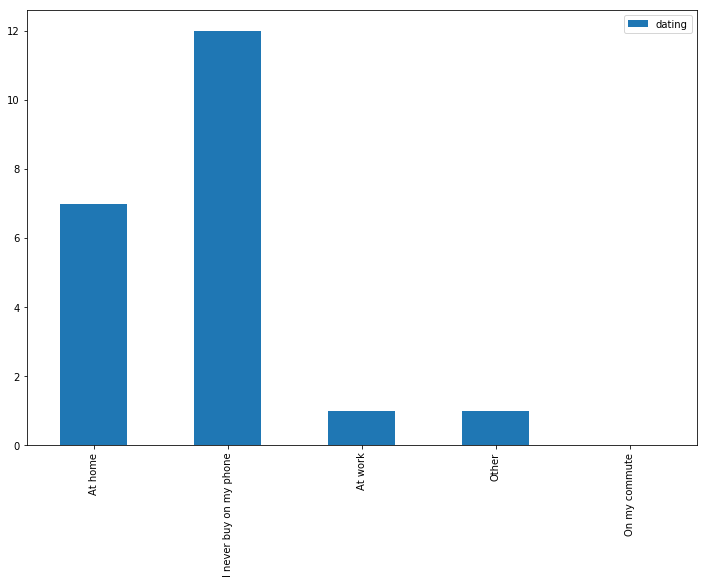

In [111]:
names_df.plot.bar(y = 'dating', figsize=(12,8))

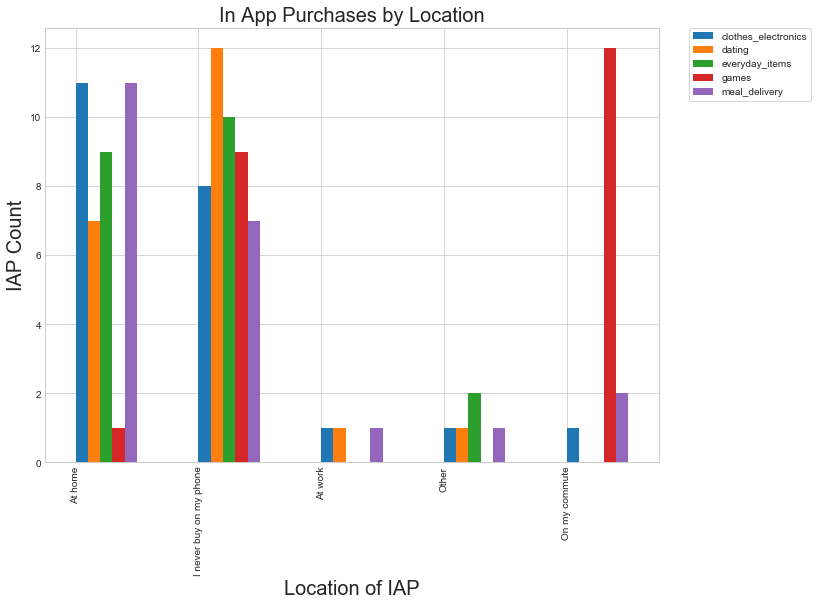

In [138]:
# plot all types by location
names_df.plot.bar(figsize=(11,8), align='edge', width=.5)
plt.title('In App Purchases by Location', fontsize=20)
plt.xlabel('Location of IAP', fontsize=20)
plt.ylabel('IAP Count', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10, frameon=True)

In [11]:
# how many of each type, for this column?
# test = results.everyday_items.value_counts().reset_index
results.pivot_table(index=iap_type, 
                        aggfunc='count', fill_value=0)

ValueError: Grouper and axis must be same length

In [12]:
# results.pivot_table(index=['everyday_items', 'clothes_electronics', 'meal_delivery', 'games', 'dating', 'tickets', 'rideshare'], aggfunc='count')
results.apply(pd.value_counts)



,timestamp,everyday_items,clothes_electronics,meal_delivery,games,dating,tickets,rideshare
4/2/2018 17:25:48,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/4/2018 14:09:51,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/4/2018 14:37:25,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/4/2018 14:46:25,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/4/2018 15:26:01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/4/2018 15:33:51,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/4/2018 15:42:50,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/4/2018 15:45:05,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/4/2018 15:59:52,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/4/2018 17:14:52,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
results['count'] = results.transform('count')
# Resetting index to make it easier to work with
# df_311sidewalk = df_311sidewalk.groupby(["Community Board", "sidewalk_complaints"]).size().reset_index()

ValueError: transforms cannot produce aggregated results

In [14]:
# Resetting index to make it easier to work with
results = results.everyday_items.value_counts #.reset_index()

AttributeError: 'function' object has no attribute 'hist'

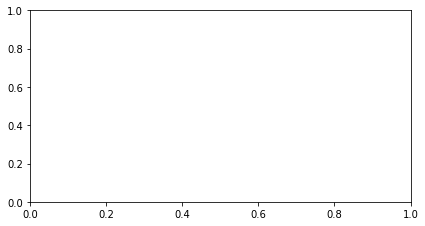

In [15]:
fig = plt.figure(figsize=(15,50))

# plot all the ridetypes 
for i in range(8): 
        ax = fig.add_subplot(12,2,i+1)
        plt.plot.hist(results[iap_type[i]], label=iap_type[i]);
        ax.legend()

In [16]:
iap_type = np.array(['timestamp', 'everyday_items', 
                     'clothes_electronics', 'meal_delivery', 'games', 'dating', 'tickets', 
                     'rideshare', 'name', 'email'])

results.columns = iap_type


AttributeError: 'method' object has no attribute 'columns'

In [ ]:
iap_type

In [ ]:
results.hist(column='everyday_items', bins=5)